# Image Processing SS 16 - Assignment - 06

### Deadline is 8.6.2016 at 16:00 o'clock

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab, scipy
import scipy.io.wavfile
from skimage.data import astronaut
from skimage.color import rgb2gray
from __future__ import division
import random
try:
    from StringIO import StringIO as BytesIO
except ImportError:
    from io import BytesIO
    
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
    
    
from PIL import Image
import itertools
import IPython

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Discrete Fourier Transformation - 4 Points
Implement the Discrete Fourier Transfromation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix).

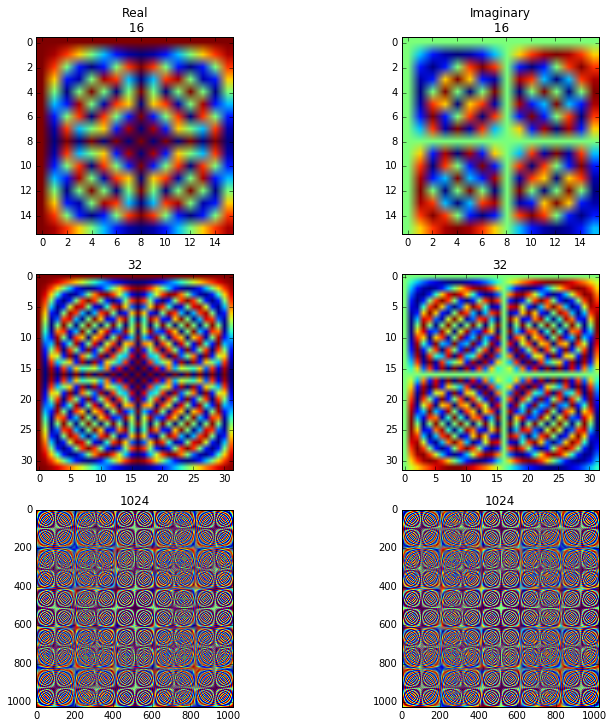

In [3]:
def dft_matrix(n):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    omega = np.exp( - 2 * np.pi * 1J / n )
    W = np.ones((n,n), dtype=complex)
    for x in range(W.shape[0]):
        for y in range(W.shape[1]):
            W[x,y] = omega**(x*y)
    return W / np.sqrt(n)

dft_16 = dft_matrix(16)
dft_32 = dft_matrix(32)
dft_1024 = dft_matrix(1024)

plt.subplot(321).set_title("Real\n 16")
plt.imshow(dft_16.real)
plt.subplot(322).set_title("Imaginary\n 16")
plt.imshow(dft_16.imag)
plt.subplot(323).set_title("32")
plt.imshow(dft_32.real)
plt.subplot(324).set_title("32")
plt.imshow(dft_32.imag)
plt.subplot(325).set_title("1024")
plt.imshow(dft_1024.real)
plt.subplot(326).set_title("1024")
plt.imshow(dft_1024.imag)
plt.show()

# Exercise 2 - Spectrogram - 6 Points

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) visualises the intensities of the differnent frequencies over time. On the x-axis is the time and on the y-axis are the frequencies. 
Your task is to build the spectrogram of the given audio clip. If you failed to do exercise 1, you can use some library for the fourier transformation.

In [4]:
def load_wav(url):
    f = urllib2.urlopen(url)
    buffer = BytesIO(f.read())
    sample_rate, audio = scipy.io.wavfile.read(buffer)
    if len(audio.shape) == 2:
        # only select one channel
        audio = audio[:, 0]
    return sample_rate, audio / audio.max()

In [5]:
delphines_url = "http://www.pmel.noaa.gov/acoustics/whales/sounds/whalewav/akhumphi1x.wav"
classic_url = "http://download.naimlabel.com/test/95ffbfec-d57f-4ba8-9fa8-f5c9da56759a.aspx"
# you can choose between delphine sounds and some classic music.
sample_rate, audio = load_wav(delphines_url)

In [6]:
# listen to the audio
IPython.display.Audio(data=audio, rate=sample_rate)

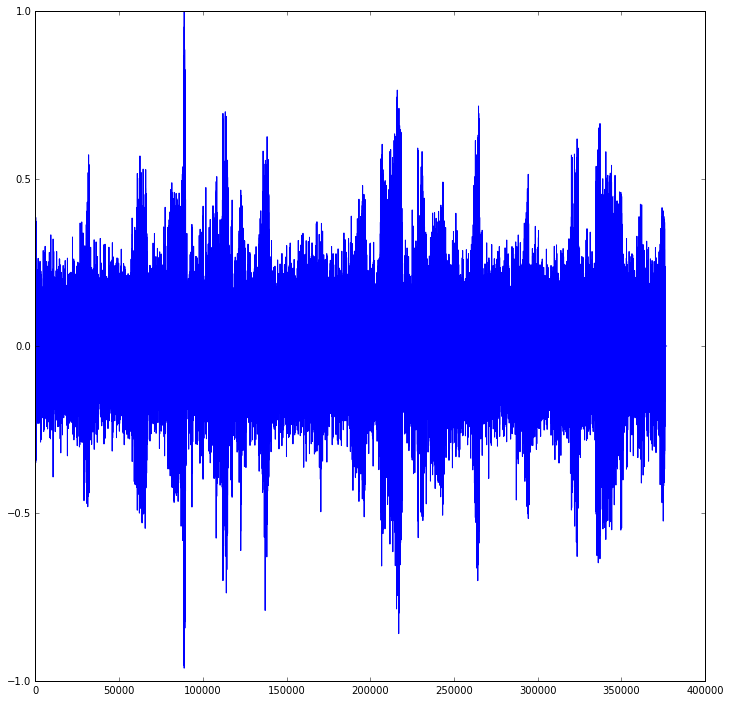

In [7]:
# plot the values.
plt.plot(audio)
plt.show()

In [8]:
def spectogram(audio, window_size=500):
    """
    Builds the spectogram of the audio clip. Split the audio clip into buckets of `window_size` and 
    use the discrete fourier transformation to get the intensity of the frequencies.
    The entery at position (i, j) of the matrix stands for the intensity of the i-th frequencies in the j-th bucket.
    """
    buckets_amount = np.int(len(audio)/window_size)
    result = np.zeros((window_size, buckets_amount),dtype=complex)
    DFT = np.matrix(dft_matrix(window_size))
    buckets = np.split(audio, range(window_size, len(audio), window_size))[:-1]
    
    for j, bucket in enumerate(buckets):
        bucket1 = bucket.transpose()
        bucket = bucket.reshape(window_size,1)
        spectrum = np.dot(DFT,bucket).reshape(1,window_size)
        result[:,j] = np.abs(spectrum)
    
    return (result*result)[len(result)//2:]

In [9]:
specgram = spectogram(audio, window_size=500)
print(specgram.shape)

(250, 754)


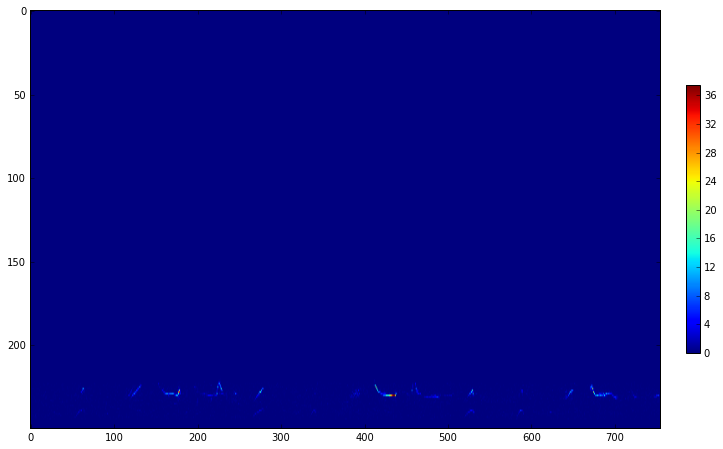

In [10]:
im = plt.imshow(specgram.real, aspect = 2)
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


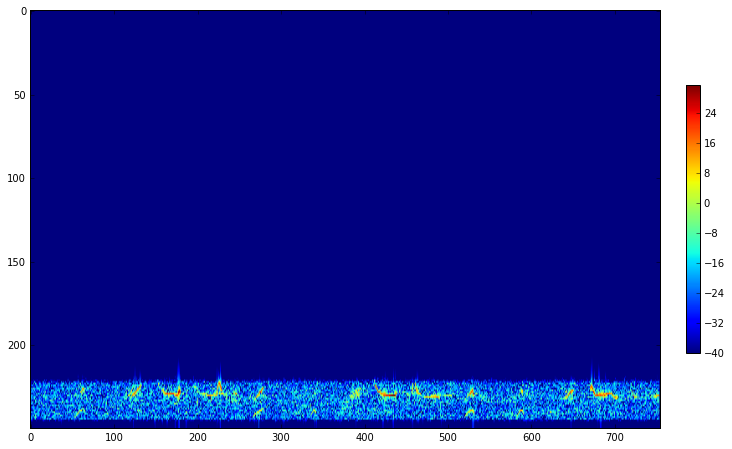

<function matplotlib.pyplot.show(*args, **kw)>

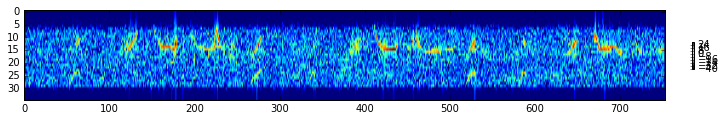

In [11]:
# plot it logarthmic
specgram = 20*np.log10(specgram)
specgram = np.clip(specgram,-40,200)             # clip off everything a hoomane cannot hear
im = plt.imshow(specgram.real, aspect = 2)    # your code here
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()

im2 = plt.imshow(specgram.real[215:], aspect = 3)      # this is the frequency spectrum where actually something happens
plt.colorbar(im2,fraction=0.002, pad=0.04)
plt.show